In [1]:
#Importing Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import itertools
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Reading csv
covid_df = pd.read_csv('day_wise.csv')
covid_df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [3]:
#Checking for null values and preparing data

null_values = covid_df.isnull().sum()
print(null_values)

# Converting the 'Date' column to datetime format

covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# Defining features and target variable

features = ['Confirmed', 'Deaths', 'Recovered', 'Active']

target = 'New cases'

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64


In [4]:
# Define thresholds for classifying 'New cases'
low_threshold = 100
medium_threshold = 1000

# Function to classify 'New cases' into categories
def categorize_new_cases(new_cases):
    if new_cases < low_threshold:
        return 'Low'
    elif new_cases < medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Create a new categorical target variable 'New cases category'
covid_df['New cases category'] = covid_df['New cases'].apply(categorize_new_cases)


# Extracting features and target variable
X = covid_df[features]
y = covid_df['New cases category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Logistic Regression Accuracy: 0.9473684210526315


Text(0, 0.5, 'True Label')

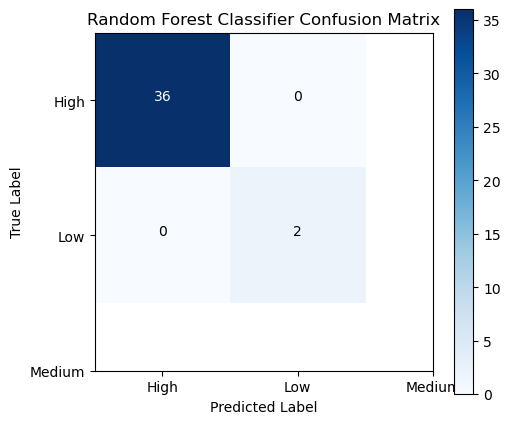

In [5]:
# Calculating confusion matrix for RandomForestClassifier
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Training a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions on the testing set for Logistic Regression
y_pred_lr = log_reg.predict(X_test)

# Evaluating the Logistic Regression model's accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Calculating confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting confusion matrix for RandomForestClassifier
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Classifier Confusion Matrix')
plt.colorbar()
classes_rf = rf_classifier.classes_
tick_marks_rf = np.arange(len(classes_rf))
plt.xticks(tick_marks_rf, classes_rf)
plt.yticks(tick_marks_rf, classes_rf)
thresh_rf = conf_matrix_rf.max() / 2.
for i, j in itertools.product(range(conf_matrix_rf.shape[0]), range(conf_matrix_rf.shape[1])):
    plt.text(j, i, format(conf_matrix_rf[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_rf[i, j] > thresh_rf else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


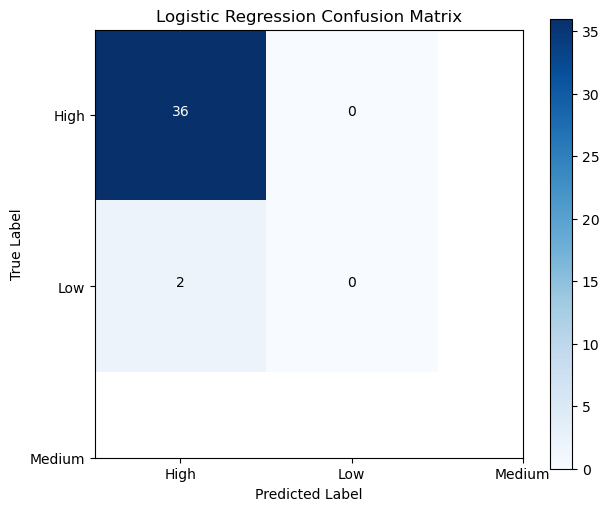

In [6]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.colorbar()
classes_lr = log_reg.classes_
tick_marks_lr = np.arange(len(classes_lr))
plt.xticks(tick_marks_lr, classes_lr)
plt.yticks(tick_marks_lr, classes_lr)
thresh_lr = conf_matrix_lr.max() / 2.
for i, j in itertools.product(range(conf_matrix_lr.shape[0]), range(conf_matrix_lr.shape[1])):
    plt.text(j, i, format(conf_matrix_lr[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_lr[i, j] > thresh_lr else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

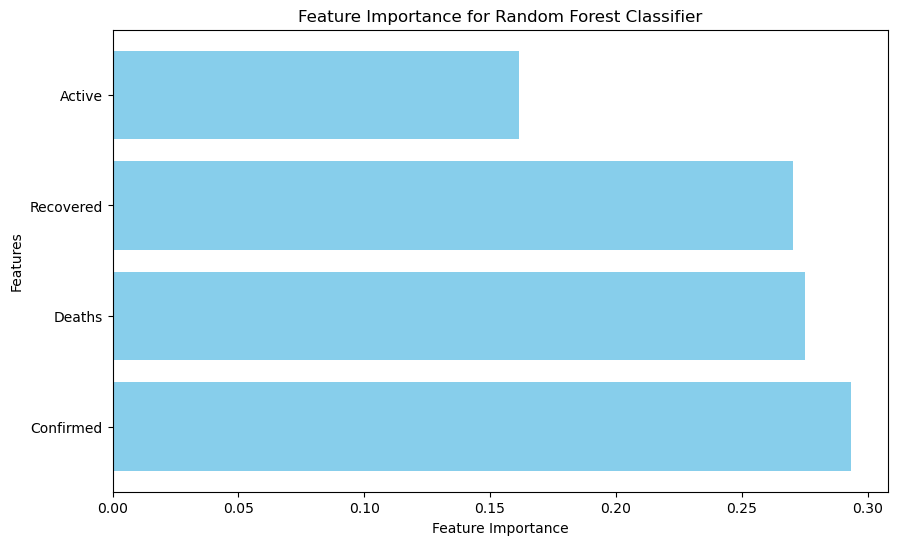

In [7]:
# Plot feature importance for Random Forest Classifier
plt.figure(figsize=(10, 6))
plt.barh(features, rf_classifier.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

C:\Users\cjsua\anacondab\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned RandomForestClassifier Accuracy: 1.0


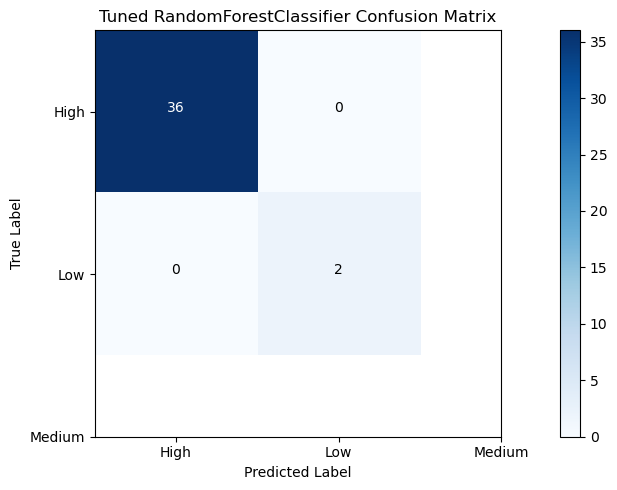

In [8]:
# Defining hyperparameters grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Getting best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting best model
best_rf_model = grid_search.best_estimator_

# Making predictions on the testing set using the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluating the best model's accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned RandomForestClassifier Accuracy:", accuracy)

# Calculate confusion matrix for tuned RandomForestClassifier
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix for tuned RandomForestClassifier
plt.figure(figsize=(12, 5))
plt.imshow(conf_matrix_tuned, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Tuned RandomForestClassifier Confusion Matrix')
plt.colorbar()
classes_tuned = best_rf_model.classes_
tick_marks_tuned = np.arange(len(classes_tuned))
plt.xticks(tick_marks_tuned, classes_tuned)
plt.yticks(tick_marks_tuned, classes_tuned)
thresh_tuned = conf_matrix_tuned.max() / 2.
for i, j in itertools.product(range(conf_matrix_tuned.shape[0]), range(conf_matrix_tuned.shape[1])):
    plt.text(j, i, format(conf_matrix_tuned[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_tuned[i, j] > thresh_tuned else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [9]:
# Initialize RandomForestClassifier with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=k, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
avg_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score:", avg_cv_score)

C:\Users\cjsua\anacondab\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.96666667 0.96666667 0.96666667 0.96666667 0.93333333]
Average Cross-Validation Score: 0.96


In [10]:
# Calculate confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

# Extract values from confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')

# Calculate specificity
specificity = true_negatives / (true_negatives + false_positives)

# Print the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Specificity:", specificity)

Confusion Matrix:
[[36  0]
 [ 0  2]]

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Specificity: 1.0


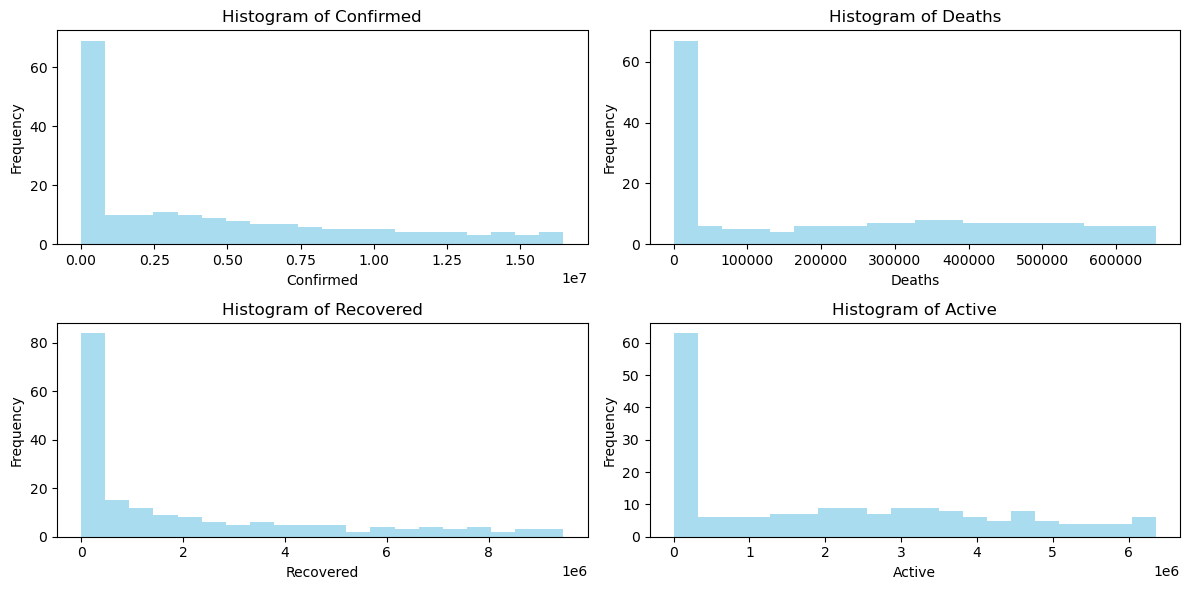

In [11]:
# Plot histograms of features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.hist(covid_df[feature], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

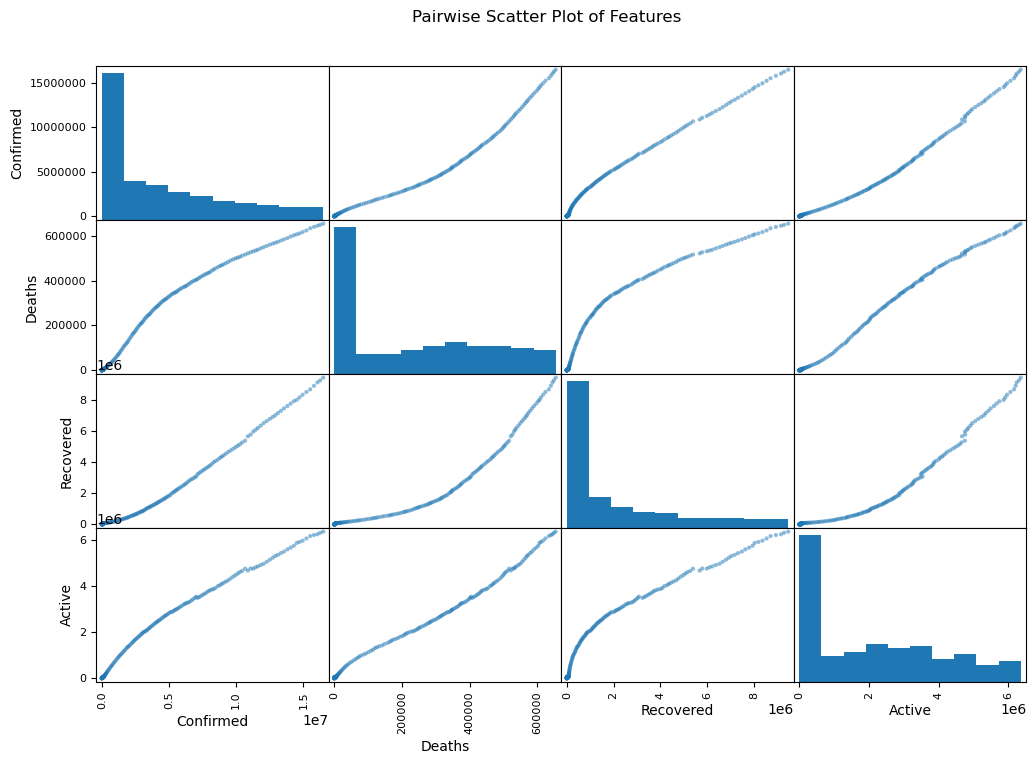

In [12]:
# Pairwise scatter plot
pd.plotting.scatter_matrix(covid_df[features], figsize=(12, 8), alpha=0.5)
plt.suptitle('Pairwise Scatter Plot of Features', y=0.95)
plt.show()


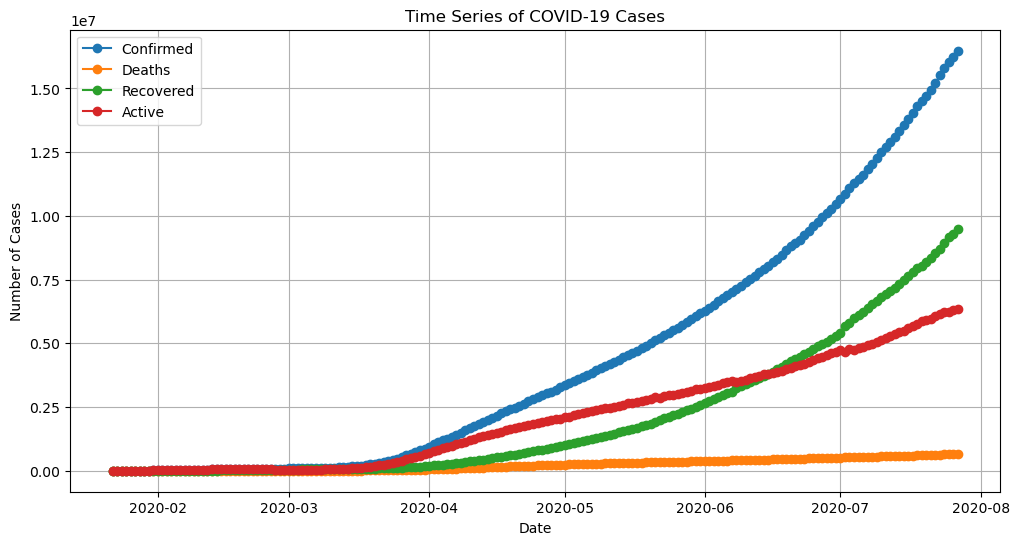

In [13]:
# Line plot of time series data
plt.figure(figsize=(12, 6))
plt.plot(covid_df['Date'], covid_df['Confirmed'], label='Confirmed', marker='o')
plt.plot(covid_df['Date'], covid_df['Deaths'], label='Deaths', marker='o')
plt.plot(covid_df['Date'], covid_df['Recovered'], label='Recovered', marker='o')
plt.plot(covid_df['Date'], covid_df['Active'], label='Active', marker='o')
plt.title('Time Series of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


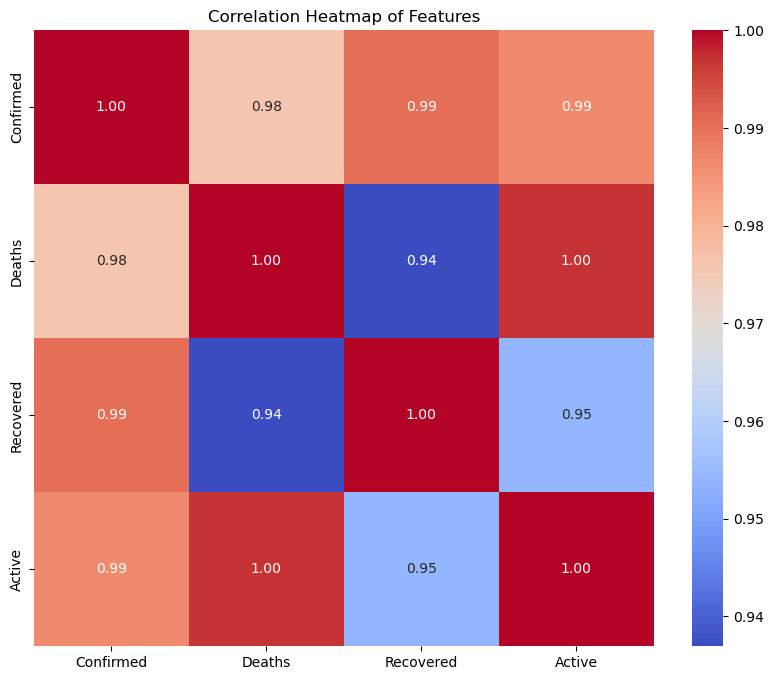

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = covid_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [15]:
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y_train))

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

Class distribution before oversampling: Counter({'High': 138, 'Medium': 10, 'Low': 2})
Class distribution after oversampling: Counter({'Medium': 138, 'High': 138, 'Low': 138})


In [16]:
# Initialize SVM classifier
svm_classifier = SVC()

# Train SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions using SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Initialize Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Train Gradient Boosting classifier
gbm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions using Gradient Boosting classifier
y_pred_gbm = gbm_classifier.predict(X_test)

# Evaluate Gradient Boosting classifier
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbm)

# Initialize Neural Network classifier
nn_classifier = MLPClassifier(random_state=42)

# Train Neural Network classifier
nn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions using Neural Network classifier
y_pred_nn = nn_classifier.predict(X_test)

# Evaluate Neural Network classifier
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Classifier Accuracy:", accuracy_nn)

SVM Classifier Accuracy: 0.6052631578947368
Gradient Boosting Classifier Accuracy: 1.0
Neural Network Classifier Accuracy: 0.7631578947368421


In [17]:
# Create new features based on existing ones
covid_df['Confirmed_per_Deaths'] = covid_df['Confirmed'] / covid_df['Deaths']
covid_df['Recovered_per_Active'] = covid_df['Recovered'] / covid_df['Active']

# Display the first few rows of the DataFrame to verify the new features
print(covid_df.head())

        Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries New cases category  \
0                   60.71                 6                Low   
1                   60.00 

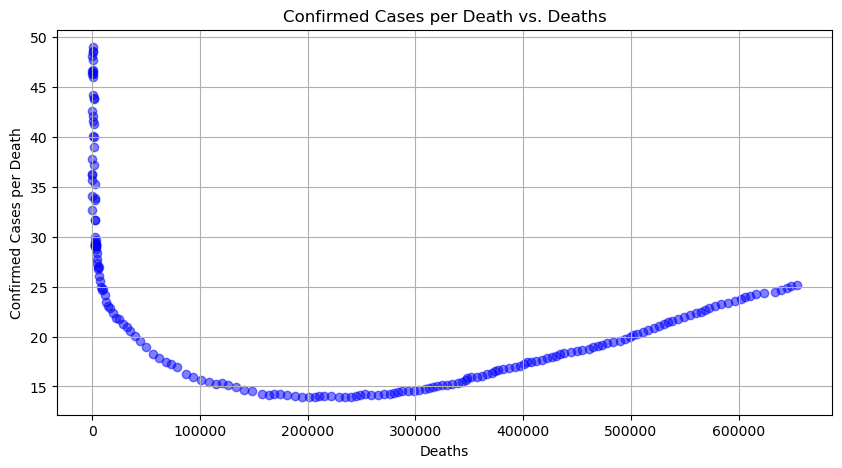

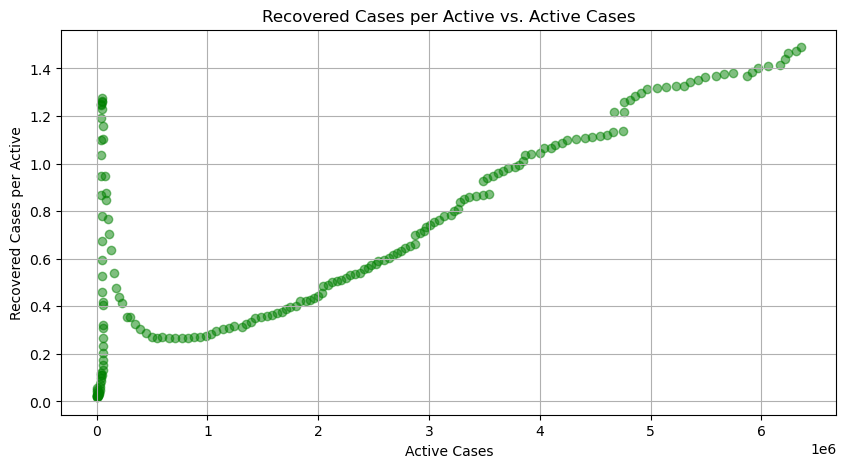

In [18]:
# Scatter plot for Confirmed_per_Deaths vs. Deaths
plt.figure(figsize=(10, 5))
plt.scatter(covid_df['Deaths'], covid_df['Confirmed_per_Deaths'], color='blue', alpha=0.5)
plt.title('Confirmed Cases per Death vs. Deaths')
plt.xlabel('Deaths')
plt.ylabel('Confirmed Cases per Death')
plt.grid(True)
plt.show()

# Scatter plot for Recovered_per_Active vs. Active
plt.figure(figsize=(10, 5))
plt.scatter(covid_df['Active'], covid_df['Recovered_per_Active'], color='green', alpha=0.5)
plt.title('Recovered Cases per Active vs. Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Recovered Cases per Active')
plt.grid(True)
plt.show()

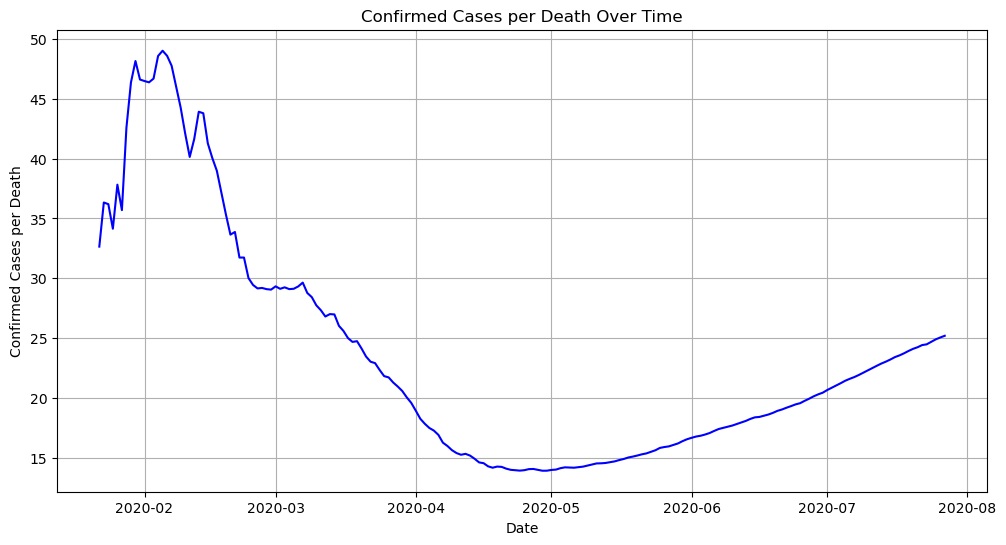

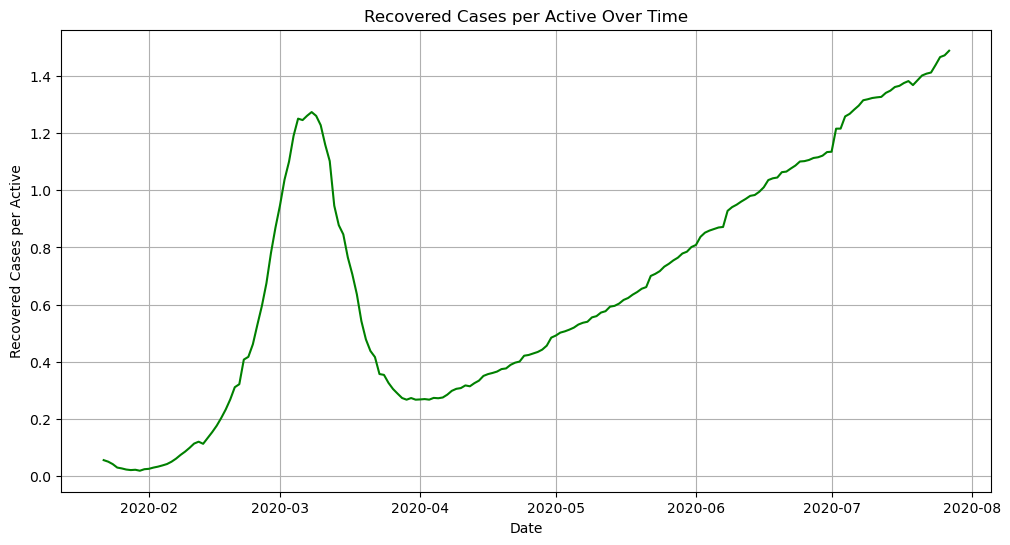

In [19]:
# Line plot for Confirmed_per_Deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y='Confirmed_per_Deaths', color='blue')
plt.title('Confirmed Cases per Death Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases per Death')
plt.grid(True)
plt.show()

# Line plot for Recovered_per_Active over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y='Recovered_per_Active', color='green')
plt.title('Recovered Cases per Active Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered Cases per Active')
plt.grid(True)
plt.show()